# LSTM Cuda test

#### NO CUDA

Epoch 0: 0.22016615655764515
Epoch 10: 0.0007101925934711831
Epoch 20: 0.000253685244103692
Epoch 30: 0.00016330946668769648
Epoch 40: 7.290377804680353e-05
Epoch 50: 6.007534426508615e-05
Epoch 60: 3.1216593179068765e-05
Epoch 70: 2.95222513980446e-05
Epoch 80: 5.9725493080270965e-05
Epoch 90: 1.217575599740401e-05
Epoch 100: 1.1369656002977368e-05
Epoch 110: 2.0169462262234933e-05
Epoch 120: 5.8050745708530405e-06
Epoch 130: 1.2978683900367764e-05
Epoch 140: 2.0820719208032512e-05
Epoch 150: 9.719112896224476e-06
Epoch 160: 8.257864576883135e-06
Epoch 170: 1.9215675091976433e-05
Epoch 180: 1.1477550535174766e-05
Epoch 190: 3.2180070904209106e-05
Epoch 200: 6.748128314993682e-06
Epoch 210: 1.177219167641844e-05
Epoch 220: 3.719775332640732e-06
Epoch 230: 1.1636867300142247e-05
Epoch 240: 3.1465973373785034e-05
Epoch 250: 6.953342524316925e-06
Epoch 260: 1.938149876099321e-05
Epoch 270: 1.4310854185352072e-05
Epoch 280: 6.77313774800292e-06
Epoch 290: 1.2292192598146938e-05
Epoch 300: 

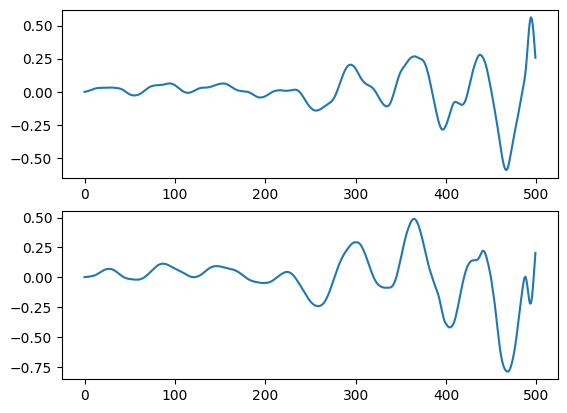

In [1]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

lstm = Forecaster.LSTMForecaster(Nr=32, Nu=1, Ns=2, No=2,)
t1 = time.time()
lags = 10
lstm_r = lstm.fit(U_train, S_train, O_train, lags=lags, patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = lstm.forecast(U=U_valid, U_spin=U_train[:,-lags+1:], S_spin=S_train[:,-lags+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

#### CUDA ENABLED

Epoch 0: 0.2069407355614848


Epoch 10: 0.0008225325110880958
Epoch 20: 0.0002575811623751812
Epoch 30: 0.00011808100259430392
Epoch 40: 9.068275689317175e-05
Epoch 50: 4.87197235495743e-05
Epoch 60: 4.167975320834958e-05
Epoch 70: 4.4306876202926e-05
Epoch 80: 6.042055185427629e-05
Epoch 90: 1.5511106717254646e-05
Epoch 100: 2.2090068382982955e-05
Epoch 110: 4.452507325783387e-05
Epoch 120: 2.5337144012435726e-05
Epoch 130: 8.774815344746006e-06
Epoch 140: 3.1804297471660215e-05
Epoch 150: 1.4269700663999343e-05
Epoch 160: 9.722026218381815e-06
Epoch 170: 5.239779877947631e-05
Epoch 180: 6.699140835212085e-06
Epoch 190: 8.434552314970425e-06
Epoch 200: 2.7880547875485062e-05
Epoch 210: 1.7416957862451012e-05
Epoch 220: 6.394315986508351e-06
Epoch 230: 7.892453878030439e-06
Epoch 240: 4.786916631089765e-06
Epoch 250: 1.7972844950605712e-05
Epoch 260: 4.064424487065677e-06
Epoch 270: 2.1640353383205727e-05
Epoch 280: 7.038033915372867e-06
Epoch 290: 1.2450596003229113e-05
Epoch 300: 1.961058254283402e-05
Epoch 310: 

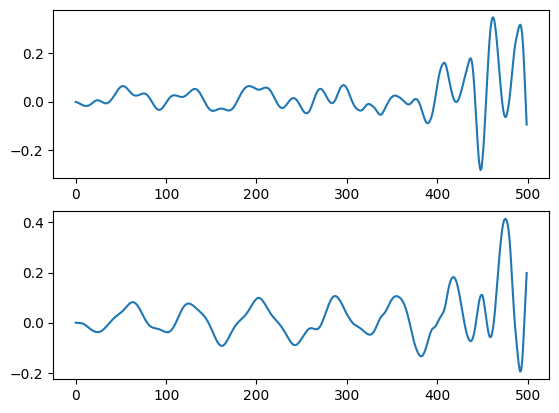

In [2]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

lstm = Forecaster.LSTMForecaster(Nr=32, Nu=1, Ns=2, No=2,)
lstm.set_device(torch.device("cuda:0"))
t1 = time.time()
lags = 10
lstm_r = lstm.fit(U_train, S_train, O_train, lags=lags,patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = lstm.forecast(U=U_valid, U_spin=U_train[:,-lags+1:], S_spin=S_train[:,-lags+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

# GRU CUDA TEST

### NO CUDA

Epoch 0: 0.19471828010812273


Epoch 10: 0.0006891254079043252
Epoch 20: 0.00021672637678782434
Epoch 30: 0.00010721302370824483
Epoch 40: 0.00011559501501562823
Epoch 50: 3.410268481397498e-05
Epoch 60: 4.529151593011559e-05
Epoch 70: 2.3144752986865884e-05
Epoch 80: 1.4534946700210246e-05
Epoch 90: 1.946182462791905e-05
Epoch 100: 3.029687401800997e-05
Epoch 110: 2.0875740161929135e-05
Epoch 120: 1.0344170710876671e-05
Epoch 130: 9.211209072807219e-06
Epoch 140: 7.515141021627167e-06
Epoch 150: 1.2335192699143578e-05
Epoch 160: 1.3683150999208667e-05
Epoch 170: 3.559924278702531e-05
Epoch 180: 6.039139497876825e-06
Epoch 190: 1.590580208775553e-05
Epoch 200: 6.204070955934739e-05
Epoch 210: 1.4041614903300898e-05
Epoch 220: 1.1718483774255133e-05
Epoch 230: 7.098999359333844e-06
Epoch 240: 1.176796563534856e-05
Epoch 250: 1.0731384882478684e-05
Epoch 260: 2.136702357937172e-05
Epoch 270: 6.5531018075e-06
Epoch 280: 1.2050374890811048e-05
Train Time: 
45.439027070999146
Forecast Time: 
0.22852659225463867


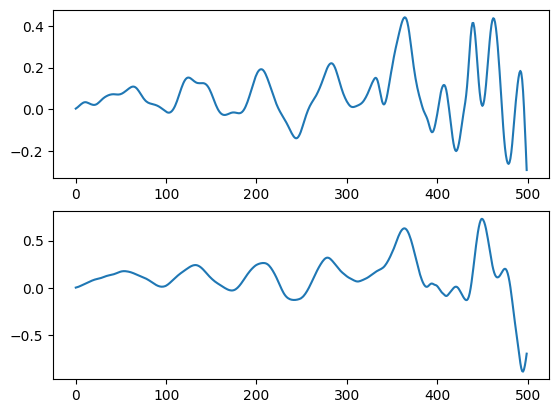

In [3]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

gru = Forecaster.GRUForecaster(Nr=32, Nu=1, Ns=2, No=2,)
lags = 10
t1 = time.time()
gru_r = gru.fit(U_train, S_train, O_train, lags=10,patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = gru.forecast(U=U_valid, U_spin=U_train[:,-lags+1:], S_spin=S_train[:,-lags+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

### CUDA ENABLED

Epoch 0: 0.18318739423175073


Epoch 10: 0.001694746747556521
Epoch 20: 0.0003223924845199684
Epoch 30: 0.0001899120288284887
Epoch 40: 0.00011997454372379918
Epoch 50: 6.71897290730069e-05
Epoch 60: 6.18168599460212e-05
Epoch 70: 3.0571770398535624e-05
Epoch 80: 3.847498377144151e-05
Epoch 90: 1.5634064871012428e-05
Epoch 100: 2.175288531315997e-05
Epoch 110: 1.2642384118661702e-05
Epoch 120: 8.979541337507364e-06
Epoch 130: 1.6722129263137297e-05
Epoch 140: 6.286626739178664e-06
Epoch 150: 9.401496952772194e-06
Epoch 160: 5.413404682534416e-06
Epoch 170: 2.5553288048486763e-05
Epoch 180: 9.054428908578645e-06
Epoch 190: 2.104235919285828e-05
Epoch 200: 6.83555670898439e-06
Epoch 210: 6.174885001349346e-06
Epoch 220: 1.9374218881971963e-05
Epoch 230: 9.938481235598956e-06
Epoch 240: 1.1080496327595274e-05
Epoch 250: 8.164903828648433e-06
Epoch 260: 6.593310926196102e-06
Train Time: 
19.45250678062439
Forecast Time: 
0.24765348434448242


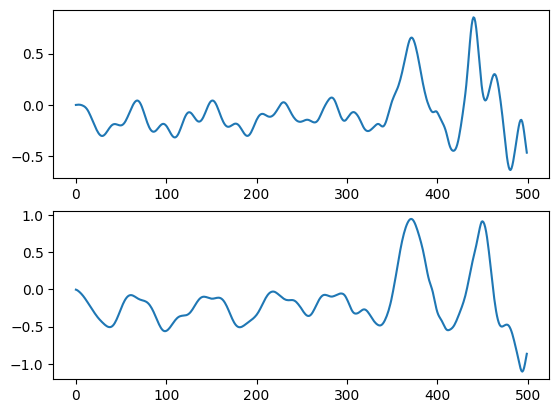

In [4]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

gru = Forecaster.GRUForecaster(Nr=32, Nu=1, Ns=2, No=2,)
gru.set_device(torch.device("cuda:0"))
lags = 3
t1 = time.time()
gru_r = gru.fit(U_train, S_train, O_train, lags=lags,patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = gru.forecast(U=U_valid, U_spin=U_train[:,-lags+1:], S_spin=S_train[:,-lags+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

## FCN CUDA TEST

### NO CUDA

Epoch 0: 0.017207106651754792


Epoch 10: 0.0005761547928062645
Epoch 20: 0.00019485739706169038
Epoch 30: 0.00021270458270007228
Epoch 40: 0.00023699131178770008
Epoch 50: 0.0003099994957503483
Epoch 60: 0.0001489073455059018
Epoch 70: 0.00019750277991162487
Epoch 80: 0.0001421718431254133
Epoch 90: 5.141427265376812e-05
Epoch 100: 0.00013404116421558552
Epoch 110: 0.00017755795255273036
Epoch 120: 3.9639614940142276e-05
Epoch 130: 3.112405674392737e-05
Epoch 140: 0.0007825345105135817
Epoch 150: 2.8493510876325178e-05
Epoch 160: 2.694467169076922e-05
Epoch 170: 0.0010218081885435008
Epoch 180: 0.00017022592142645096
Epoch 190: 0.00022567744405154418
Epoch 200: 0.00018048906056398082
Epoch 210: 5.056763748349446e-05
Epoch 220: 2.5994324704087547e-05
Epoch 230: 0.00011004723590283339
Epoch 240: 2.936702332589539e-05
Epoch 250: 2.5657155961778216e-05
Epoch 260: 9.97693509028632e-05
Epoch 270: 0.00013815891127813698
Epoch 280: 4.80230426425883e-05
Epoch 290: 6.111822974335583e-05
Epoch 300: 5.782644899191635e-05
Epoch 

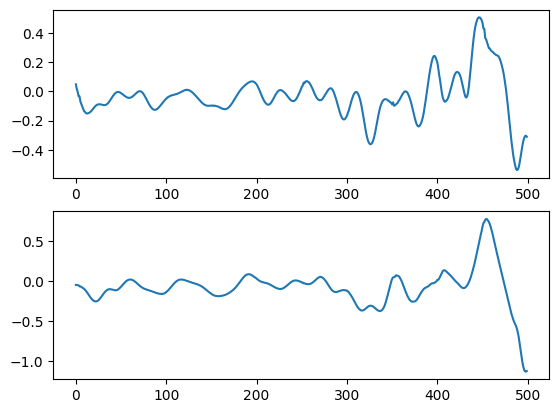

In [5]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

fcn = Forecaster.FCForecaster(Nu=1, Ns=2, No=2, r_list=[100,100], tds=[-1,-2,-3,-4,-5])
t1 = time.time()
fcn.fit(U_train, S_train, O_train,patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = fcn.forecast(U=U_valid, U_spin=U_train[:,-50+1:], S_spin=S_train[:,-50+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

#### CUDA

Epoch 0: 0.020251964646635923


Epoch 10: 0.0005209418122319224
Epoch 20: 0.00016126283916933029
Epoch 30: 0.0002284733217033837
Epoch 40: 0.0001324304559647588
Epoch 50: 0.00012616549635646862
Epoch 60: 0.00013380804060182387
Epoch 70: 0.00015888932375369765
Epoch 80: 8.970382413296224e-05
Epoch 90: 0.0001673811159535426
Epoch 100: 0.00012555996640170535
Epoch 110: 0.00032142957167826893
Epoch 120: 4.021763768721689e-05
Epoch 130: 7.5591143826985e-05
Epoch 140: 0.0001650684016677142
Epoch 150: 3.268048467835279e-05
Epoch 160: 0.00017549580683770126
Epoch 170: 3.7965440012296496e-05
Epoch 180: 6.94135349023887e-05
Epoch 190: 7.669129730549992e-05
Epoch 200: 0.00025773497802021524
Epoch 210: 0.00011656785816478167
Epoch 220: 6.105440693139069e-05
Epoch 230: 7.201913505324241e-05
Epoch 240: 7.090382611723587e-05
Epoch 250: 3.781843772124385e-05
Train Time: 
15.972481727600098
Forecast Time: 
0.14493894577026367


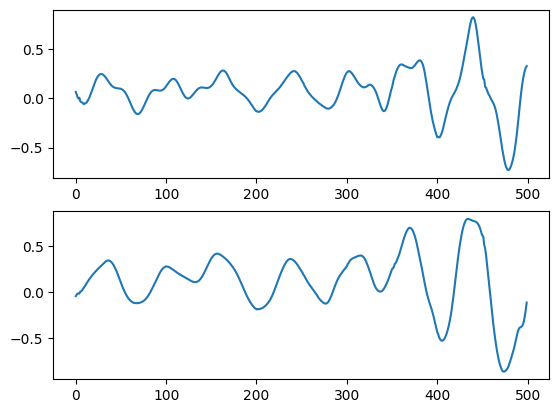

In [6]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

fcn = Forecaster.FCForecaster(Nu=1, Ns=2, No=2, r_list=[100,100], tds=[-1,-2,-3,-4,-5],)
fcn.set_device(torch.device("cuda:0"))
t1 = time.time()
fcn.fit(U_train, S_train, O_train,patience=10)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = fcn.forecast(U=U_valid, U_spin=U_train[:,-50:], S_spin=S_train[:,-50:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

# ESN CUDA TEST

### NO CUDA

Train Time: 
1.0326247215270996
Forecast Time: 
0.12627100944519043


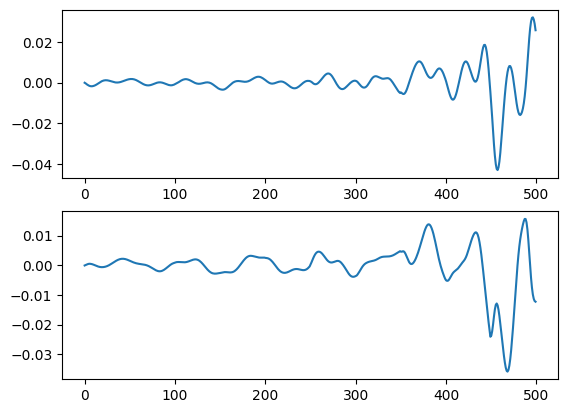

In [7]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

esn = Forecaster.ESNForecaster(Nu=1, Ns=2, No=2, Nr=1000)
t1 = time.time()
input_r = esn.fit(U_train, S_train, O_train)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

spin_r = esn.spin(U_spin=U_train[:,-50:], S_spin=S_train[:,-50:])
t3 = time.time()
fcast = esn.forecast(U_valid, spin_r, S_valid[:,:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

### CUDA ENABLED

Train Time: 
0.9119148254394531
Forecast Time: 
0.13000702857971191


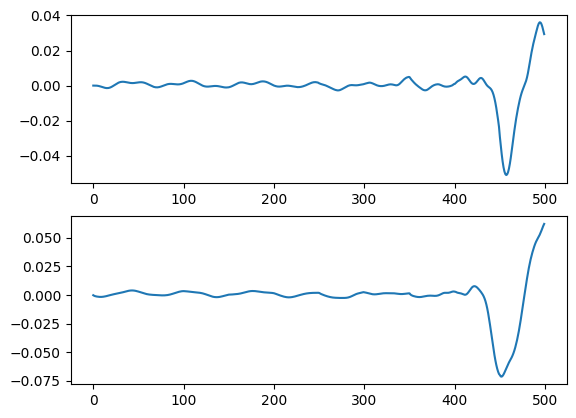

In [8]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

esn = Forecaster.ESNForecaster(Nu=1, Ns=2, No=2, Nr=1000)
esn.set_device(torch.device("cuda:0"))
t1 = time.time()
input_r = esn.fit(U_train, S_train, O_train)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

spin_r = esn.spin(U_spin=U_train[:,-500:], S_spin=S_train[:,-500:])
t3 = time.time()
fcast = esn.forecast(U_valid, spin_r, S_valid[:,:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

# Linear CUDA TEST

### NO CUDA

Train Time: 
0.14464378356933594
Forecast Time: 
0.036835432052612305


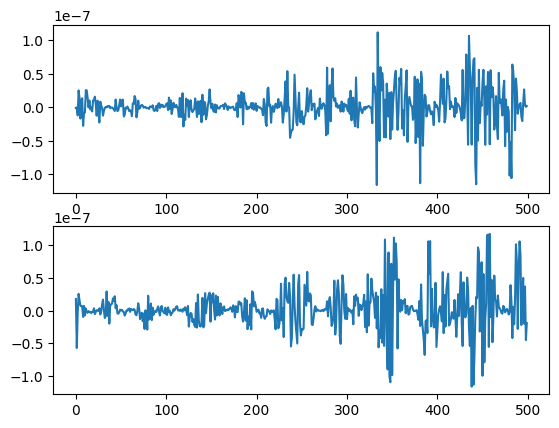

In [9]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

lin = Forecaster.LinearForecaster(Nu=1, Ns=2, No=2, tds=[-1,-2,-3,-4,-5])
t1 = time.time()
lin.fit(U_train, S_train, O_train)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = lin.forecast(U=U_valid, U_spin=U_train[:,-50+1:], S_spin=S_train[:,-50+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()

### CUDA Enabled

Train Time: 
0.48160624504089355
Forecast Time: 
0.0766451358795166


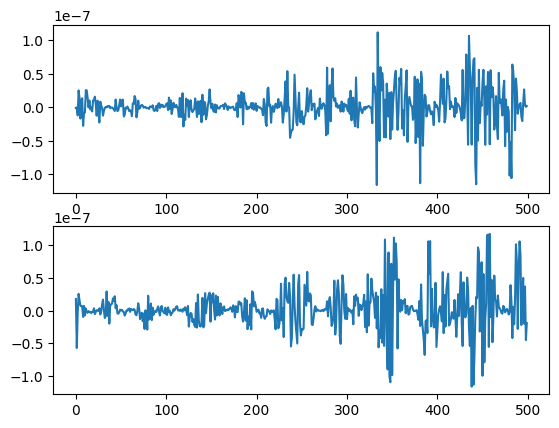

In [10]:
import torch
import RNNmpc.Forecasters as Forecaster
import json
import time


f = open('/home/jmpw1/Documents/Control/RNNmpc/data/SpringMassTrainData/data.json')
data_dict = json.load(f)

U_train = torch.tensor(data_dict['U_train'], dtype=torch.float64)[:,-5000:]
S_train = torch.tensor(data_dict['S_train'], dtype=torch.float64)[[0,2],-5000:]
O_train = torch.tensor(data_dict['O_train'], dtype=torch.float64)[[0,2],-5000:]

U_valid = torch.tensor(data_dict['U_valid'], dtype=torch.float64)[:,:]
S_valid = torch.tensor(data_dict['S_valid'], dtype=torch.float64)[[0,2],:]
O_valid = torch.tensor(data_dict['O_valid'], dtype=torch.float64)[[0,2],:]

lin = Forecaster.LinearForecaster(Nu=1, Ns=2, No=2, tds=[-1,-2,-3,-4,-5])
lin.set_device(torch.device("cuda:0"))
t1 = time.time()
lin.fit(U_train, S_train, O_train)
t2 = time.time()
train_time = t2 - t1
print("Train Time: ")
print(train_time)

t3 = time.time()
fcast = lin.forecast(U=U_valid, U_spin=U_train[:,-50+1:], S_spin=S_train[:,-50+1:], s_k=S_valid[:,0:1])
t4 = time.time()

print("Forecast Time: ")
print(t4 - t3)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(fcast[0].detach().cpu().numpy() - O_valid[0].detach().numpy())

ax[1].plot(fcast[1].detach().cpu().numpy() - O_valid[1].detach().numpy())
plt.show()